# Importing Libraries:

In [1]:
import vaex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset:

In [2]:
vaex_df = vaex.open('all_merged_hdf5.hdf5')

In [3]:
vaex_df.head()

#,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-05-01 00:14:50.000000,2019-05-01 00:16:48.000000,1,0,1,N,145,145,2,3,0.5,0.5,0,0,0.3,4.3,0
1,1,2019-05-01 00:35:54.000000,2019-05-01 00:37:27.000000,1,1.5,1,N,145,145,2,3,0.5,0.5,0,0,0.3,4.3,0
2,1,2019-05-01 00:37:45.000000,2019-05-01 00:37:49.000000,1,1.5,1,N,145,145,2,2.5,0.5,0.5,0,0,0.3,3.8,0
3,1,2019-05-01 00:44:57.000000,2019-05-01 00:50:11.000000,1,0.7,1,N,161,161,2,5,3,0.5,0,0,0.3,8.8,2.5
4,1,2019-05-01 00:59:48.000000,2019-05-01 01:10:22.000000,1,2,1,N,163,141,1,9.5,3,0.5,2,0,0.3,15.3,2.5
5,2,2019-05-01 00:48:04.000000,2019-05-01 00:49:00.000000,1,0,1,N,193,193,2,2.5,0.5,0.5,0,0,0.3,3.8,0
6,2,2019-05-01 00:05:26.000000,2019-05-01 00:05:34.000000,1,0,1,N,193,193,2,2.5,0.5,0.5,0,0,0.3,3.8,0
7,1,2019-05-01 00:23:20.000000,2019-05-01 00:32:57.000000,1,2.5,1,N,260,56,2,10,0.5,0.5,0,0,0.3,11.3,0
8,1,2019-05-01 00:35:54.000000,2019-05-01 00:47:49.000000,1,2.8,1,N,56,226,2,11.5,0.5,0.5,0,0,0.3,12.8,0
9,1,2019-05-01 00:20:12.000000,2019-05-01 00:26:52.000000,1,2,1,N,79,164,1,8,3,0.5,2.35,0,0.3,14.15,2.5


In [4]:
vaex_df.shape

(84399019, 18)

# Analyzing Dataset

In [5]:
vaex_df.describe()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
data_type,float64,large_string,large_string,float64,float64,float64,string,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
count,84152418,84399019,84399019,84152418,84399019,84152418,84152418,84399019,84399019,84152418,84399019,84399019,84399019,84399019,84399019,84399019,84399019,79543038
NA,246601,0,0,246601,0,246601,246601,0,0,246601,0,0,0,0,0,0,0,4855981
mean,1.6454766516631762,--,--,1.5626939442191667,3.0009277213279097,1.0612957075101515,--,163.15761897659024,161.35274483462894,1.289363224239142,13.343991200776065,1.0865968630512077,0.4946098435101477,2.195064126992676,0.3828310446379221,0.2986038973080952,19.12436323081165,2.1881800277731407
std,0.497875,--,--,1.207917,8.091114,0.759543,--,66.016038,70.250878,0.479133,174.374901,1.248594,0.067281,15.657058,1.817217,0.0279,184.087361,0.837313
min,1.0,--,--,0.0,-37264.53,1.0,--,1.0,1.0,1.0,-1856.0,-60.0,-0.5,-221.0,-70.0,-0.3,-1871.8,-2.5
max,4.0,--,--,9.0,45977.22,99.0,--,265.0,265.0,5.0,943274.8,535.38,212.42,141492.02,3288.0,1.0,1084772.17,4.5


### The main here is to train a model for evaluating fare-charge for a trip.
#### Hence Removing unnecessary columns from the data:

In [5]:
vaex_df.drop('tpep_pickup_datetime',inplace = True)
vaex_df.drop('tpep_dropoff_datetime',inplace = True)
vaex_df.drop('store_and_fwd_flag',inplace = True)
vaex_df.drop('payment_type',inplace = True)
vaex_df.drop('extra',inplace = True)
vaex_df.drop('mta_tax',inplace = True)
vaex_df.drop('tip_amount',inplace = True)
vaex_df.drop('tolls_amount',inplace = True)
vaex_df.drop('improvement_surcharge',inplace = True)
vaex_df.drop('congestion_surcharge',inplace = True)
vaex_df.drop('total_amount',inplace = True)

#,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,fare_amount
0,1.0,1.0,0.0,1.0,145.0,145.0,3.0
1,1.0,1.0,1.5,1.0,145.0,145.0,3.0
2,1.0,1.0,1.5,1.0,145.0,145.0,2.5
3,1.0,1.0,0.7,1.0,161.0,161.0,5.0
4,1.0,1.0,2.0,1.0,163.0,141.0,9.5
...,...,...,...,...,...,...,...
"84,399,014",nan,nan,3.11,nan,188.0,225.0,26.81
"84,399,015",nan,nan,14.34,nan,14.0,141.0,40.91
"84,399,016",nan,nan,13.16,nan,86.0,76.0,54.25
"84,399,017",nan,nan,12.66,nan,60.0,134.0,37.2


In [6]:
vaex_df.shape

(84399019, 7)

### Handling NaN :
#### Counting percentage of NaN values for each column:

In [8]:
col_NaN = []

for col in vaex_df.column_names:
    nan_value = vaex_df[col].isna().sum().item()
    col_NaN.append(nan_value / len(vaex_df) * 100)

s = pd.Series(data=col_NaN, index=vaex_df.column_names).sort_values(ascending=True)
s

trip_distance      0.000000
pulocationid       0.000000
dolocationid       0.000000
fare_amount        0.000000
vendorid           0.292185
passenger_count    0.292185
ratecodeid         0.292185
dtype: float64

#### Handling NaN for vendorID, passenger_count and ratecodeID:

In [7]:
#vendorid:

vendor_id_array = vaex_df.evaluate(vaex_df['vendorid'])

# Create a boolean mask to filter out NaN values
mask = ~np.isnan(vendor_id_array)

# Filter the array to remove NaN values
vendor_id_array_without_nan = vendor_id_array[mask]

# Calculate the mode using numpy.unique()
unique_elements, counts = np.unique(vendor_id_array_without_nan, return_counts=True)

# Find the mode(s) - the value(s) with the highest count
mode_values = unique_elements[counts == counts.max()]

print(f"The mode(s) of the array are: {mode_values}")

vaex_df['vendorid'] = vaex_df['vendorid'].fillna(value = int(mode_values)) #filling mode value


The mode(s) of the array are: [2.]


In [8]:
#pasenger count:

pass_id_array = vaex_df.evaluate(vaex_df['passenger_count'])

# Create a boolean mask to filter out NaN values
mask = ~np.isnan(pass_id_array)

# Filter the array to remove NaN values
pass_id_array_without_nan = pass_id_array[mask]

# Calculate the mode using numpy.unique()
unique_elements, counts = np.unique(pass_id_array_without_nan, return_counts=True)

# Find the mode(s) - the value(s) with the highest count
mode_values = unique_elements[counts == counts.max()]

print(f"The mode(s) of the array are: {mode_values}")

vaex_df['passenger_count'] = vaex_df['passenger_count'].fillna(value = int(mode_values)) #filling mode value

The mode(s) of the array are: [1.]


In [9]:
vaex_df['ratecodeid'].unique()

[nan, 6.0, 99.0, 5.0, 2.0, 3.0, 1.0, 4.0]

In [10]:
# rate code ID:
rate_id_array = vaex_df.evaluate(vaex_df['ratecodeid'])

# Create a boolean mask to filter out NaN values
mask = ~np.isnan(rate_id_array)

# Filter the array to remove NaN values
rate_id_array_without_nan = rate_id_array[mask]

# Calculate the mode using numpy.unique()
unique_elements, counts = np.unique(rate_id_array_without_nan, return_counts=True)

# Find the mode(s) - the value(s) with the highest count
mode_values = unique_elements[counts == counts.max()]

print(f"The mode(s) of the array are: {mode_values}")

vaex_df['ratecodeid'] = vaex_df['ratecodeid'].fillna(value = int(mode_values)) #filling mode value

The mode(s) of the array are: [1.]


In [11]:
col_NaN = []

for col in vaex_df.column_names:
    nan_value = vaex_df[col].isna().sum().item()
    col_NaN.append(nan_value / len(vaex_df) * 100)

s = pd.Series(data=col_NaN, index=vaex_df.column_names).sort_values(ascending=True)
s

vendorid             0.000000
passenger_count      0.000000
trip_distance        0.000000
ratecodeid           0.000000
pulocationid         0.000000
dolocationid         0.000000
fare_amount          0.000000
__vendorid           0.292185
__passenger_count    0.292185
__ratecodeid         0.292185
dtype: float64

so all the null values are treated now.

### Handling outliers:

In [14]:
# Calculate the correlation:
print(f"The correlation value between fare_charge and vendorid is: {vaex_df.correlation(vaex_df['vendorid'],vaex_df['fare_amount'])}")
print(f"The correlation value between fare_charge and passenger_count is: {vaex_df.correlation(vaex_df['passenger_count'],vaex_df['fare_amount'])}")
print(f"The correlation value between fare_charge and trip_distance is: {vaex_df.correlation(vaex_df['trip_distance'],vaex_df['fare_amount'])}")
print(f"The correlation value between fare_charge and ratecodeid is: {vaex_df.correlation(vaex_df['ratecodeid'],vaex_df['fare_amount'])}")

The correlation value between fare_charge and vendorid is: 0.001037575283722214
The correlation value between fare_charge and passenger_count is: 0.00019365279581163273
The correlation value between fare_charge and trip_distance is: 0.029766857836222273
The correlation value between fare_charge and ratecodeid is: 0.022590496770560922


1. From basic sense we can say that atleast fare_charge and trip_distance should have a strong positive correlation but as can be seen, though they are having positive correlation but that is not strong enough. This is because of outliers present in both the columns.
2. Below, when we plot all the 8.4 crore points, we are unable to see any kind of linear pattern between trip_distance and fare_charge but we could easily see outliers which are responsible for scalling up the graph so much that the actual relationship between both the columns cannot be seen.

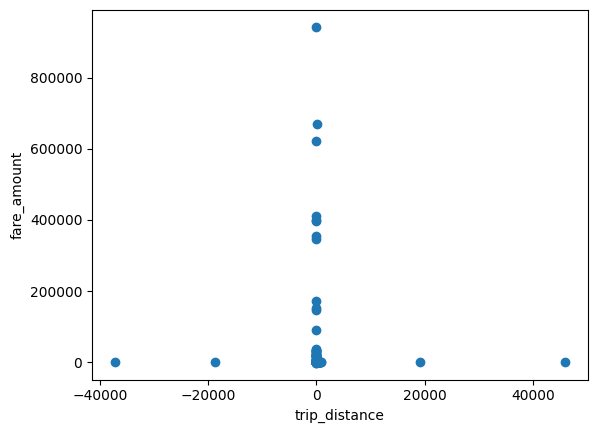

In [22]:
#Scatter plot between various columns with fare_charge:
vaex_df.viz.scatter(x=vaex_df['trip_distance'],y=vaex_df['fare_amount'],length_check=False)

In [23]:
# Check if there are any negative values in the "trip_distance" column
if vaex_df['trip_distance'].min() < 0:
    print("The 'trip_distance' column contains negative values.")
else:
    print("The 'trip_distance' column does not contain negative values.")


The 'trip_distance' column contains negative values.


1. As can be seen in the figure below, when we remove the outliers from the trip_distance by shortning our scale (from 0 to 100), still we are unable to see any kind of relationship and this is becuase there are outliers present in the fare_charge column as well. Hence we need to tackle them as well.

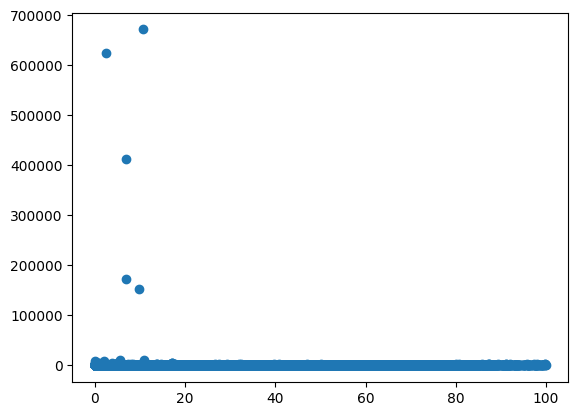

In [53]:
plt.scatter(x= filtered_np_df, y=filtered_np_df1)

- But as soon as we limit our size and randomly pick some samples from the dataset, we could easily see a linear relationship between the columns.

In [71]:
vaex_df.trip_distance.value_counts()

 0.90      1633310
 0.80      1628377
 1.00      1604702
 0.70      1548413
 1.10      1531523
            ...   
 120.60          1
 60.27           1
-25.70           1
-19.93           1
 79.60           1
Length: 9519, dtype: int64

In [41]:
# Randomly sample 1000 points from the DataFrame for plotting
sample_df = vaex_df.sample(n=1000)

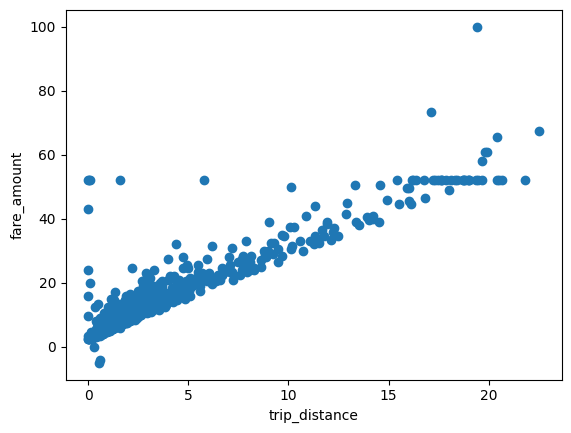

In [42]:
sample_df.viz.scatter(x=sample_df['trip_distance'],y=sample_df['fare_amount'])

In [12]:
new_df_trip_filtered100 = vaex_df[vaex_df.trip_distance < 100]
new_df_trip_filtered0 = new_df_trip_filtered100[new_df_trip_filtered100.trip_distance>0]

In [13]:
new_df_trip_filtered0.shape

(83647779, 7)

In [14]:
new_df_trip_filtered0.fare_amount.value_counts()

 6.00      4111639
 6.50      4073221
 7.00      3990914
 5.50      3975099
 7.50      3823772
            ...   
-86.70           1
 78.76           1
-48.99           1
-129.00          1
 254.30          1
Length: 9970, dtype: int64

In [15]:
new_df_fare_filtered100 = new_df_trip_filtered0[new_df_trip_filtered0.fare_amount < 100]
new_df_fare_filtered0 = new_df_fare_filtered100[new_df_fare_filtered100.fare_amount > 0]

In [16]:
new_df_fare_filtered0.shape

(83424919, 7)

In [17]:
print(f"The correlation value between fare_charge and trip_distance is: {new_df_fare_filtered0.correlation(new_df_fare_filtered0['trip_distance'],new_df_fare_filtered0['fare_amount'])}")

The correlation value between fare_charge and trip_distance is: 0.9417799094793031


#### hence we got a strong positive correlation between them (0.94)
#### Now similarly handling outliers (if present) in other columns as well.

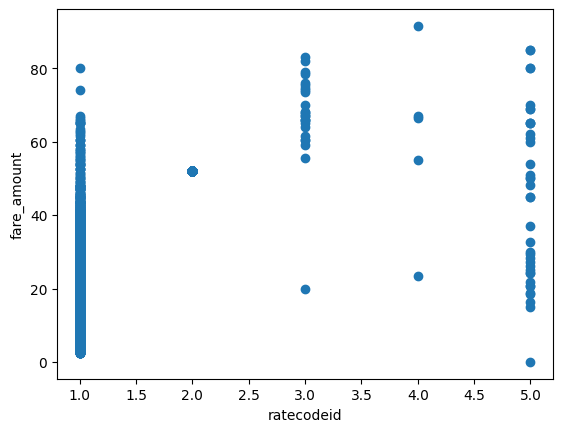

In [105]:
samples = new_df_fare_filtered0.sample(n=10000)
samples.viz.scatter(x = samples.ratecodeid, y = samples.fare_amount)

In [106]:
new_df_fare_filtered0.ratecodeid.unique()

[6.0, 99.0, 5.0, 2.0, 3.0, 1.0, 4.0]

In [107]:
new_df_fare_filtered0.ratecodeid.value_counts()

1.0     80805511
2.0      2147798
5.0       243108
3.0       175535
4.0        50878
99.0        1886
6.0          203
dtype: int64

- so there is an outlier in the rate_code_id column which is a categorical column.
- the outlier seems to be rate_code_id with value 99.

In [18]:
new_df_ratecode_filtered = new_df_fare_filtered0[new_df_fare_filtered0.ratecodeid<7]

In [19]:
new_df_ratecode_filtered.ratecodeid.unique()

[6.0, 5.0, 2.0, 3.0, 1.0, 4.0]

In [114]:
# similarly vendor_id is also a categorical column. lets check if any outlier present:
new_df_ratecode_filtered.vendorid.unique()

[2.0, 1.0, 4.0]

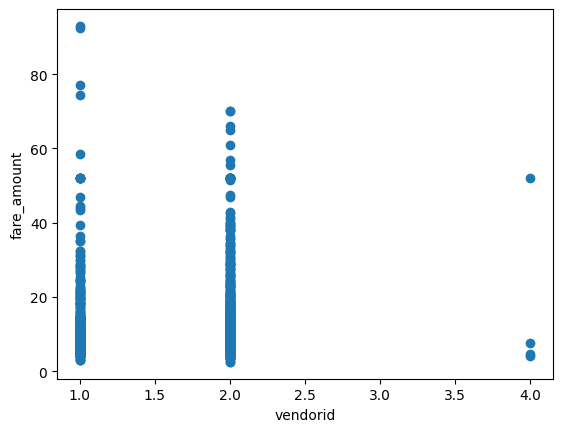

In [115]:
samples = new_df_ratecode_filtered.sample(n=1000)
samples.viz.scatter(x = samples.vendorid, y = samples.fare_amount)

- definately vendorid with values 4 can be treated as an outlier and hence we need to remove it.

In [20]:
new_df_vendor_filtered = new_df_ratecode_filtered[new_df_ratecode_filtered.vendorid < 2.5]

In [21]:
new_df_vendor_filtered.shape

(83157794, 7)

In [118]:
new_df_vendor_filtered.vendorid.unique()

[2.0, 1.0]

In [119]:
# Checking Passenger_count column for outliers:
new_df_vendor_filtered.passenger_count.unique()

[0.0, 6.0, 5.0, 2.0, 3.0, 9.0, 8.0, 1.0, 4.0, 7.0]

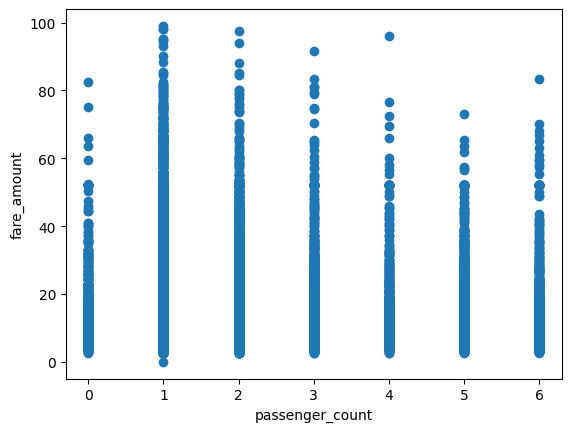

In [120]:
samples = new_df_vendor_filtered.sample(n=50000)
samples.viz.scatter(x=samples.passenger_count , y=samples.fare_amount)

In [121]:
new_df_vendor_filtered.passenger_count.value_counts()

1.0    58345840
2.0    12661427
3.0     3552168
5.0     3378434
6.0     2028863
4.0     1690597
0.0     1500078
7.0         162
8.0         127
9.0          98
dtype: int64

In [32]:
df = new_df_vendor_filtered[new_df_vendor_filtered.passenger_count<7]

In [33]:
df.shape

(83157407, 7)

In [34]:
df.passenger_count.unique()

[0.0, 6.0, 5.0, 2.0, 3.0, 1.0, 4.0]

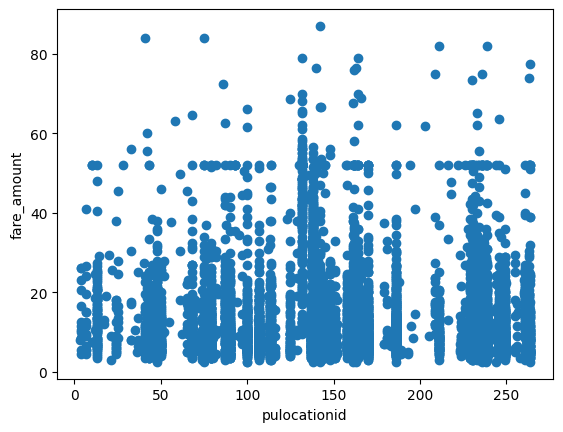

In [125]:
samples = df.sample(n=10000)
samples.viz.scatter(x=samples.pulocationid,y=samples.fare_amount)

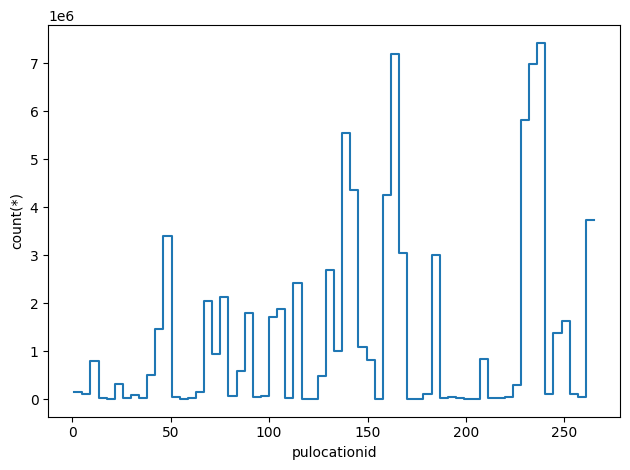

In [24]:
df.viz.histogram(x=df.pulocationid)

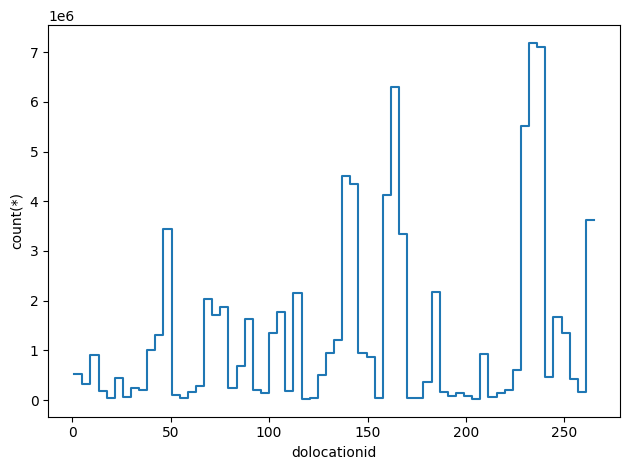

In [25]:
df.viz.histogram(x=df.dolocationid)

- no need to manipulate pulocationid and dolocationid columns as they dont seems to have bothered with outliers and moreover they don't seem to have any sort of relationship with fare_amount. 

In [35]:
df.column_names

['vendorid',
 '__vendorid',
 'passenger_count',
 '__passenger_count',
 'trip_distance',
 'ratecodeid',
 '__ratecodeid',
 'pulocationid',
 'dolocationid',
 'fare_amount']

In [37]:
#dropping pulocationid and dolocationid columns from df:
df.drop('pulocationid',inplace = True)
df.drop('dolocationid',inplace = True)

#,vendorid,passenger_count,trip_distance,ratecodeid,fare_amount
0,1.0,1.0,1.5,1.0,3.0
1,1.0,1.0,1.5,1.0,2.5
2,1.0,1.0,0.7,1.0,5.0
3,1.0,1.0,2.0,1.0,9.5
4,1.0,1.0,2.5,1.0,10.0
...,...,...,...,...,...
"83,157,402",2.0,1.0,3.11,1.0,26.81
"83,157,403",2.0,1.0,14.34,1.0,40.91
"83,157,404",2.0,1.0,13.16,1.0,54.25
"83,157,405",2.0,1.0,12.66,1.0,37.2


# train_test split:

In [72]:
df_train,df_test = df.shuffle().ml.train_test_split(test_size=0.01)

C:\Users\swapn\AppData\Local\Programs\Python\Python310\lib\site-packages\vaex\ml\__init__.py:28: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


In [73]:
df_train.shape

(82325833, 5)

In [74]:
df_test.shape

(831574, 5)

In [75]:
from vaex.ml.sklearn import IncrementalPredictor
from sklearn.linear_model import SGDRegressor

In [76]:
features = ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid']
target = 'fare_amount'

model = SGDRegressor()

vaex_model = IncrementalPredictor(features=features, target=target, model=model, batch_size=1000000)

vaex_model.fit(df=df_train, progress='widget')


In [77]:
# Export the trained model to a pickle file
import pickle
pickle.dump(vaex_model, open('model_SGD.pkl', 'wb'))

In [78]:
df_test = vaex_model.transform(df_test)

In [79]:
df_test.head()

#,vendorid,passenger_count,trip_distance,ratecodeid,fare_amount,prediction
0,2,1,1.05,1,6.5,7.93092
1,2,1,0.67,1,5,6.94506
2,2,6,0.95,1,6.5,7.8347
3,1,1,2.9,1,12.5,12.8534
4,2,1,1.62,1,10,9.4097
5,2,1,1.08,1,7.5,8.00875
6,1,1,2.1,1,11,10.7779
7,2,1,3.84,1,15.5,15.1692
8,2,1,5.05,1,20,18.3084
9,1,1,1.1,1,7,8.18359


In [88]:
import sklearn
from sklearn.metrics import r2_score
print("R2 score :",r2_score(y_true = df_test['fare_amount'].values, y_pred = df_test['prediction'].values))
print('MAE :',mean_absolute_error(df_test['fare_amount'].values,df_test['prediction'].values))

R2 score : 0.8974953056387874
MAE : 2.1102811558044094


In [103]:
f = ['vendorid', 'passenger_count', 'trip_distance', 'ratecodeid','fare_amount']
scaler = vaex.ml.StandardScaler(features = f, prefix = 'scaled_')
df_trans = scaler.fit_transform(df)
df_train_trans,df_test_trans = df_trans.shuffle().ml.train_test_split(test_size=0.1)
df_trans.head()

C:\Users\swapn\AppData\Local\Programs\Python\Python310\lib\site-packages\vaex\ml\__init__.py:28: UserWarning: Make sure the DataFrame is shuffled
  warnings.warn('Make sure the DataFrame is shuffled')


#,vendorid,passenger_count,trip_distance,ratecodeid,fare_amount,scaled_vendorid,scaled_passenger_count,scaled_trip_distance,scaled_ratecodeid,scaled_fare_amount
0,1,1,1.5,1,3,-1.3322,-0.466957,-0.393891,-0.14956,-0.914489
1,1,1,1.5,1,2.5,-1.3322,-0.466957,-0.393891,-0.14956,-0.959671
2,1,1,0.7,1,5,-1.3322,-0.466957,-0.602373,-0.14956,-0.73376
3,1,1,2,1,9.5,-1.3322,-0.466957,-0.26359,-0.14956,-0.32712
4,1,1,2.5,1,10,-1.3322,-0.466957,-0.133289,-0.14956,-0.281938
5,1,1,2.8,1,11.5,-1.3322,-0.466957,-0.0551078,-0.14956,-0.146392
6,1,1,2,1,8,-1.3322,-0.466957,-0.26359,-0.14956,-0.462667
7,1,1,3.7,1,13.5,-1.3322,-0.466957,0.179435,-0.14956,0.0343372
8,2,1,2.09,1,13,0.750637,-0.466957,-0.240136,-0.14956,-0.010845
9,1,1,2.5,1,11,-1.3322,-0.466957,-0.133289,-0.14956,-0.191574


In [94]:
features = ['scaled_vendorid', 'scaled_passenger_count', 'scaled_trip_distance', 'scaled_ratecodeid']
target = 'scaled_fare_amount'

model = SGDRegressor()

vaex_model = IncrementalPredictor(features=features, target=target, model=model, batch_size=1000000)

vaex_model.fit(df=df_train_trans, progress='widget')

In [104]:
df_test_t = vaex_model.transform(df_test_trans)

In [106]:
df_test_t.head()

#,vendorid,passenger_count,trip_distance,ratecodeid,fare_amount,scaled_vendorid,scaled_passenger_count,scaled_trip_distance,scaled_ratecodeid,scaled_fare_amount,prediction
0,1,1,1.5,1,7.5,-1.3322,-0.466957,-0.393891,-0.14956,-0.507849,-0.3648
1,2,2,8.95,1,31.5,0.750637,0.359312,1.5476,-0.14956,1.6609,1.35844
2,1,2,0.6,1,4.5,-1.3322,0.359312,-0.628434,-0.14956,-0.778942,-0.573092
3,1,1,2.2,1,9.5,-1.3322,-0.466957,-0.211469,-0.14956,-0.32712,-0.202682
4,2,1,8.9,1,26,0.750637,-0.466957,1.53457,-0.14956,1.16389,1.34672
5,1,1,1.8,1,11.5,-1.3322,-0.466957,-0.31571,-0.14956,-0.146392,-0.295321
6,2,1,1.24,1,7,0.750637,-0.466957,-0.461648,-0.14956,-0.553031,-0.427311
7,2,2,1.3,1,7,0.750637,0.359312,-0.446012,-0.14956,-0.553031,-0.41327
8,2,1,1.08,1,6,0.750637,-0.466957,-0.503344,-0.14956,-0.643396,-0.464366
9,1,1,1.6,1,8.5,-1.3322,-0.466957,-0.367831,-0.14956,-0.417485,-0.34164


In [107]:
print("R2 score :",r2_score(y_true = df_test_t['scaled_fare_amount'].values, y_pred = df_test_t['prediction'].values))
print('MAE :',mean_absolute_error(df_test_t['scaled_fare_amount'].values,df_test_t['prediction'].values))

R2 score : 0.8977767873763092
MAE : 0.18903433123587984


In [108]:
pickle.dump(vaex_model, open('model_SGD_t.pkl', 'wb'))